In [2]:
import numpy as np
import pandas as pd

### Timestamp Object

Time stamps reference particular moments in time (e.g., Oct 24th, 2025 at 7:00pm)

### Creating Timestamp objects

In [11]:
# creating a timestamp
type(pd.Timestamp('2025/9/4'))

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
# variations
print(pd.Timestamp('2025-9-4'))
print(pd.Timestamp('2025, 9, 4'))

2025-09-04 00:00:00
2025-09-04 00:00:00


In [13]:
pd.Timestamp('4/9/2025')
# but be careful with this format as it can be confused with month/day/year format in some countries like USA .

Timestamp('2025-04-09 00:00:00')

In [20]:
# only year
pd.Timestamp('2025')

Timestamp('2025-01-01 00:00:00')

In [22]:
# using text
pd.Timestamp('5th september 2025')

Timestamp('2025-09-05 00:00:00')

In [26]:
# providing time also
pd.Timestamp('2023-01-05 09:21')

Timestamp('2023-01-05 09:21:00')

In [29]:
pd.Timestamp('5th september 2025 9:25 PM')

Timestamp('2025-09-05 21:25:00')

In [30]:
# AM and PM

In [34]:
# using datetime.datetime object from python standard library
import datetime as dt

x = pd.Timestamp(dt.datetime(2025,9,5,9,21,56))
x

Timestamp('2025-09-05 09:21:56')

In [32]:
# fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

56

### why separate objects to handle data and time when python already has datetime functionality?

- Python's built-in datetime module provides a variety of tools for manipulating dates and times.
- But it is not optimized for vectorized operations on large arrays of dates and times.
- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [35]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [36]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### DatetimeIndex Object

A collection of pandas timestamp

In [4]:
# from strings
a = pd.DatetimeIndex(['2025/9/1','2025/9/2','2025/9/3'])
type(a)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
type(a[0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
import datetime as dt

In [9]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [10]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])

In [11]:
# using datatimeindex as series index

pd.Series([1,2,3],index=dt_index)

2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

### date_range function



In [13]:
# generate daily dates in a given range
pd.date_range(start='2025/9/5',end='2025/9/28',freq='D')    # D -> daily frequency , by default freq is D

DatetimeIndex(['2025-09-05', '2025-09-06', '2025-09-07', '2025-09-08',
               '2025-09-09', '2025-09-10', '2025-09-11', '2025-09-12',
               '2025-09-13', '2025-09-14', '2025-09-15', '2025-09-16',
               '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
               '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
               '2025-09-25', '2025-09-26', '2025-09-27', '2025-09-28'],
              dtype='datetime64[ns]', freq='D')

In [15]:
# alternate days in a given range
pd.date_range(start='2025/9/5',end='2025/9/28',freq='2D')

DatetimeIndex(['2025-09-05', '2025-09-07', '2025-09-09', '2025-09-11',
               '2025-09-13', '2025-09-15', '2025-09-17', '2025-09-19',
               '2025-09-21', '2025-09-23', '2025-09-25', '2025-09-27'],
              dtype='datetime64[ns]', freq='2D')

In [17]:
# B -> business days
pd.date_range(start='2025/9/5',end='2025/9/28',freq='B')

DatetimeIndex(['2025-09-05', '2025-09-08', '2025-09-09', '2025-09-10',
               '2025-09-11', '2025-09-12', '2025-09-15', '2025-09-16',
               '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-22',
               '2025-09-23', '2025-09-24', '2025-09-25', '2025-09-26'],
              dtype='datetime64[ns]', freq='B')

In [20]:
# W -> one week per day
pd.date_range(start='2025/9/5',end='2025/9/30',freq='W-THU')

DatetimeIndex(['2025-09-11', '2025-09-18', '2025-09-25'], dtype='datetime64[ns]', freq='W-THU')

In [22]:
# H -> Hourly data(factor)
pd.date_range(start='2025/9/5',end='2025/9/28',freq='6h')

DatetimeIndex(['2025-09-05 00:00:00', '2025-09-05 06:00:00',
               '2025-09-05 12:00:00', '2025-09-05 18:00:00',
               '2025-09-06 00:00:00', '2025-09-06 06:00:00',
               '2025-09-06 12:00:00', '2025-09-06 18:00:00',
               '2025-09-07 00:00:00', '2025-09-07 06:00:00',
               '2025-09-07 12:00:00', '2025-09-07 18:00:00',
               '2025-09-08 00:00:00', '2025-09-08 06:00:00',
               '2025-09-08 12:00:00', '2025-09-08 18:00:00',
               '2025-09-09 00:00:00', '2025-09-09 06:00:00',
               '2025-09-09 12:00:00', '2025-09-09 18:00:00',
               '2025-09-10 00:00:00', '2025-09-10 06:00:00',
               '2025-09-10 12:00:00', '2025-09-10 18:00:00',
               '2025-09-11 00:00:00', '2025-09-11 06:00:00',
               '2025-09-11 12:00:00', '2025-09-11 18:00:00',
               '2025-09-12 00:00:00', '2025-09-12 06:00:00',
               '2025-09-12 12:00:00', '2025-09-12 18:00:00',
               '2025-09-

In [24]:
# M -> Month end
pd.date_range(start='2025/1/5',end='2025/9/28',freq='ME')

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31'],
              dtype='datetime64[ns]', freq='ME')

In [25]:
# MS -> Month start
pd.date_range(start='2025/1/5',end='2025/9/28',freq='MS')

DatetimeIndex(['2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01',
               '2025-06-01', '2025-07-01', '2025-08-01', '2025-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [28]:
# A -> Year end
pd.date_range(start='2025/1/5',end='2030/2/28',freq='YE')

DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [33]:
# using periods(number of results) : generates specified number of results from the start date
pd.date_range(start='2025/1/5',periods=25,freq='D')

DatetimeIndex(['2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10', '2025-01-11', '2025-01-12',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20',
               '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
               '2025-01-25', '2025-01-26', '2025-01-27', '2025-01-28',
               '2025-01-29'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range(start='2025/1/5',periods=25,freq='YS')

DatetimeIndex(['2026-01-01', '2027-01-01', '2028-01-01', '2029-01-01',
               '2030-01-01', '2031-01-01', '2032-01-01', '2033-01-01',
               '2034-01-01', '2035-01-01', '2036-01-01', '2037-01-01',
               '2038-01-01', '2039-01-01', '2040-01-01', '2041-01-01',
               '2042-01-01', '2043-01-01', '2044-01-01', '2045-01-01',
               '2046-01-01', '2047-01-01', '2048-01-01', '2049-01-01',
               '2050-01-01'],
              dtype='datetime64[ns]', freq='YS-JAN')

### to_datetime function

converts an existing objects to pandas timestamp/datetimeindex object

In [36]:
# simple series example

s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s).dt.day_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [37]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce').dt.month_name()   # invalid date will be converted to NaT (Not a Time) , because of errors='coerce' .

0    January
1    January
2        NaN
dtype: object

In [41]:
df = pd.read_csv('../DataSets/expense_data.csv')
df.shape

(277, 11)

In [42]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [44]:
df.info()
# since our date column is object type , we need to convert it to datetime type to perform datetime operations .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [45]:
df['Date'] = pd.to_datetime(df['Date'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


### dt accessor

Accessor object for datetimelike properties of the Series values.

- Extracting attributes
    - year
    - month
    - day
    - hour
    - minute
    - second
    - dayofweek (Monday=0, Sunday=6)
    - dayofyear         : Day of the year (1 to 365/366)
    - week              : Week ordinal of the year (1 to 52/53). Same as `weekofyear`.
    - weekofyear
    - quarter           : Quarter of the date. Ranges from 1 to 4.
    - is_month_start
    - is_month_end
    - is_quarter_start
    - is_quarter_end
    - is_year_start
    - is_year_end
    - is_leap_year      :  Boolean indicator if the year is a leap year.
    - days_in_month     : Number of days in the month
    - isocalendar       : Returns a DataFrame with ISO year, week number, and weekday.
    - tz                : Time zone of the timestamp

In [48]:
df['Date'].dt.is_quarter_start

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

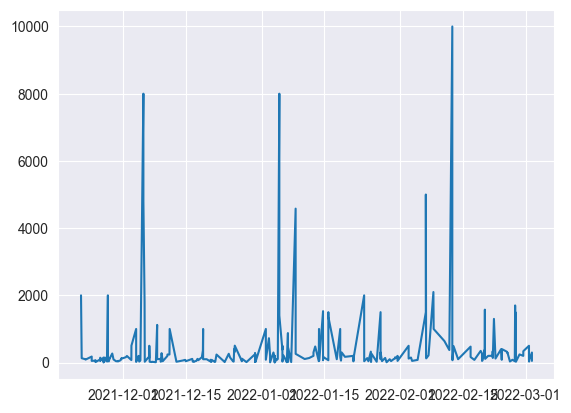

In [50]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [52]:
# day name wise bar chart/month wise bar chart

df['day_name'] = df['Date'].dt.day_name()

In [53]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


<Axes: xlabel='day_name'>

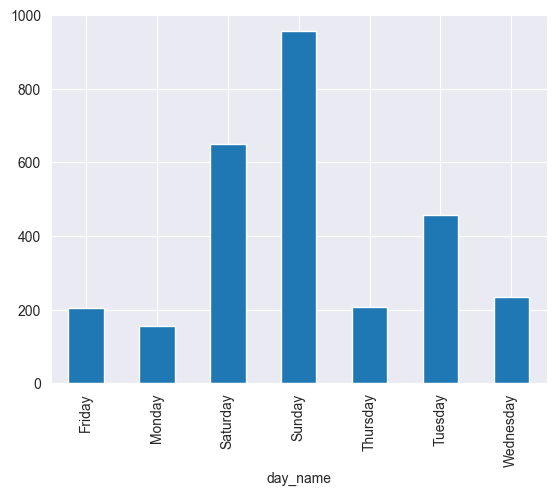

In [54]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')

In [55]:
df['month_name'] = df['Date'].dt.month_name()

In [56]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday,March


<Axes: xlabel='month_name'>

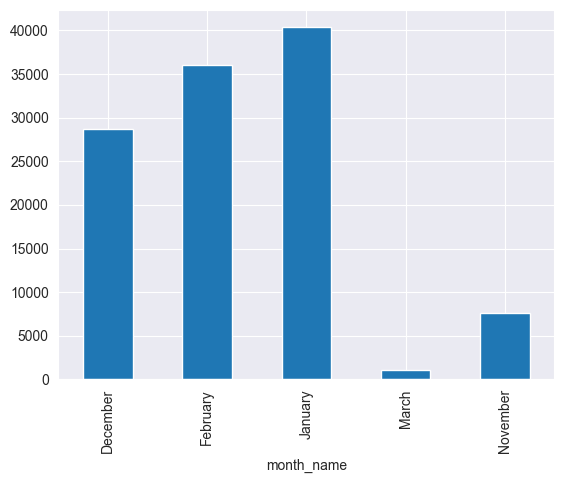

In [57]:
df.groupby('month_name')['INR'].sum().plot(kind='bar')